# Exploratory Data Analysis

#### We are working with the data with null values in TVL, close price and market cap because we want to see since when there's registration and how it has evolved from 24-09-2023 to 21-09-2024.

## Libraries

In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

## Loading data

In [2]:
# Function to load JSON
def loadJSON(filepath):
    with open(filepath) as file:
        return json.load(file)

In [19]:
# Loading the dataframe from json
df = pd.DataFrame(loadJSON('../../data/json/tokens-final-null.json'))
print(df.shape)

df.head()

(76804, 8)


,Date,Token,Name,TVL,Market cap,Price,Correlation,Class
0,24-09-2023,BTC,Bitcoin,1.610619e+08,5.179683e+11,26261.44,0,4
1,25-09-2023,BTC,Bitcoin,1.546845e+08,5.117877e+11,26297.93,0,4
2,26-09-2023,BTC,Bitcoin,1.536478e+08,5.121034e+11,26212.59,0,4
3,27-09-2023,BTC,Bitcoin,1.481046e+08,5.110543e+11,26360.20,0,4
4,28-09-2023,BTC,Bitcoin,1.478454e+08,5.137136e+11,27027.20,0,4


In [32]:
# Basic stats
df.describe()

,TVL,Market cap,Price,Correlation,Class
count,6.275900e+04,6.639000e+04,68792.000000,68796.000000,68796.000000
mean,3.836110e+08,8.989037e+09,303.283979,0.253241,3.624339
std,3.536897e+09,8.359898e+10,3995.788086,0.434871,1.024388
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,5.625709e+05,1.696271e+07,0.007149,0.000000,4.000000
50%,3.663128e+06,1.091658e+08,0.136700,0.000000,4.000000
75%,3.210735e+07,7.710732e+08,1.058000,1.000000,4.000000
max,6.797230e+10,1.436631e+12,73118.090000,1.000000,4.000000


## Basic graphs to understand the data

### Tokens with the highest average market cap

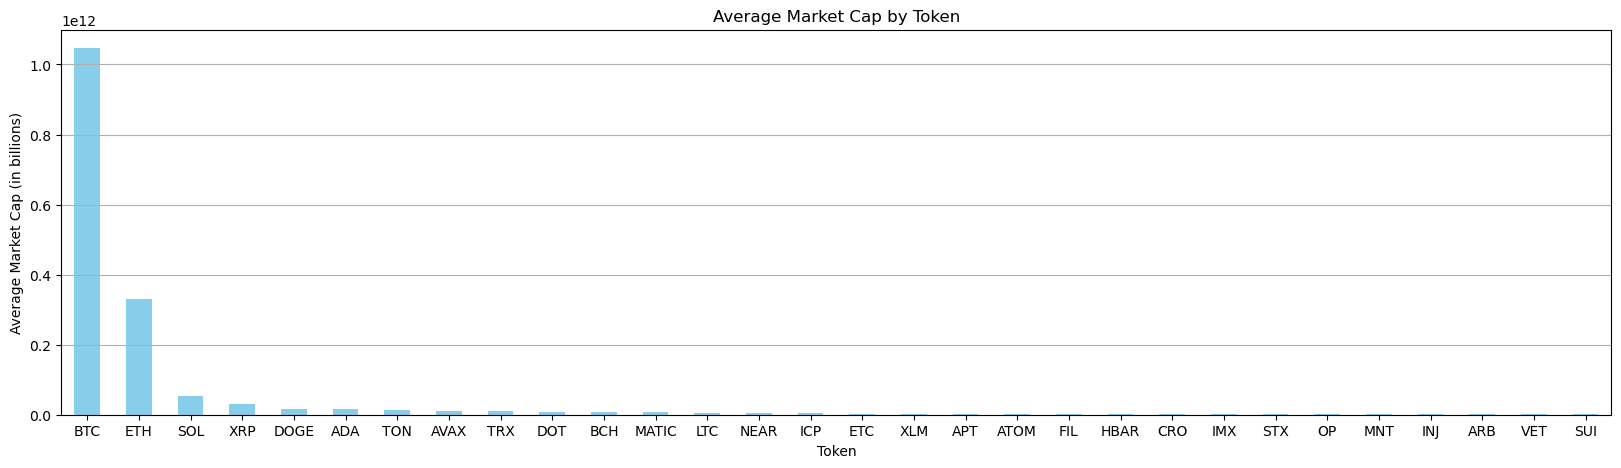

In [20]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_desc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_desc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in billions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

## Tokens with the lowest average market cap

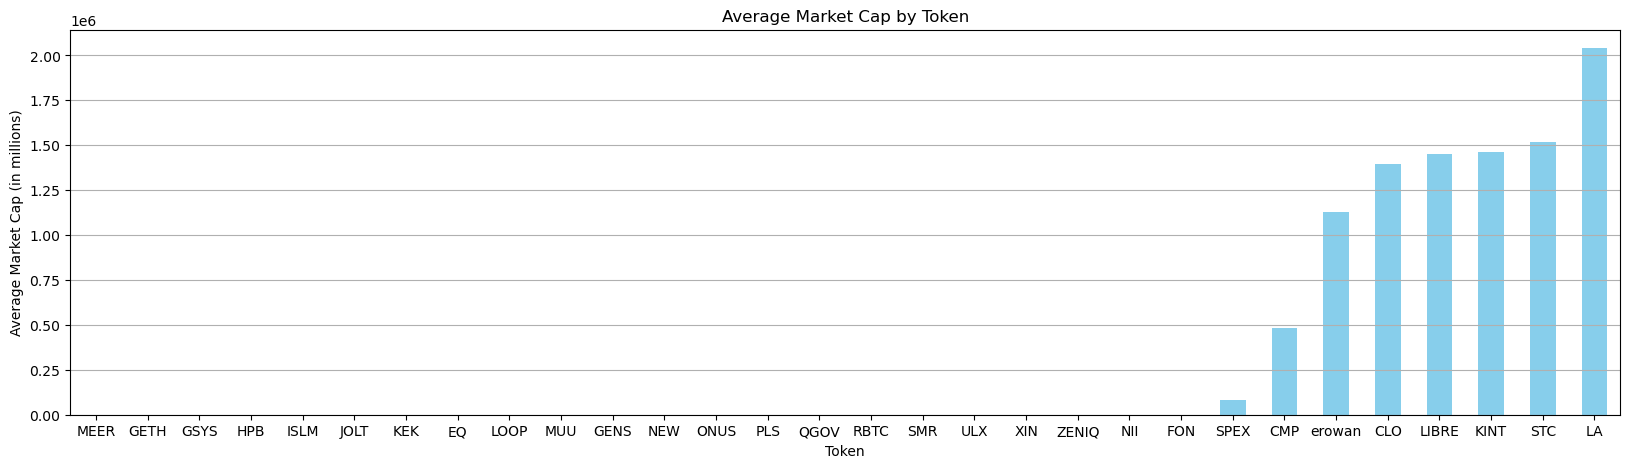

In [22]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can see that there are some tokens with average market cap in zero, we can get rid of them :)

In [25]:
# Calculate the average market cap for each token
average_market_cap = df.groupby('Token')['Market cap'].mean().reset_index()

# Identify tokens with an average market cap of 0
tokens_with_zero_market_cap = average_market_cap[average_market_cap['Market cap'] == 0]['Token']

# Filter out rows corresponding to those tokens
df = df[~df['Token'].isin(tokens_with_zero_market_cap)]

# Display the filtered DataFrame
print(df.shape)
df.head()

(68796, 8)


,Date,Token,Name,TVL,Market cap,Price,Correlation,Class
0,24-09-2023,BTC,Bitcoin,1.610619e+08,5.179683e+11,26261.44,0,4
1,25-09-2023,BTC,Bitcoin,1.546845e+08,5.117877e+11,26297.93,0,4
2,26-09-2023,BTC,Bitcoin,1.536478e+08,5.121034e+11,26212.59,0,4
3,27-09-2023,BTC,Bitcoin,1.481046e+08,5.110543e+11,26360.20,0,4
4,28-09-2023,BTC,Bitcoin,1.478454e+08,5.137136e+11,27027.20,0,4


#### We can display again!

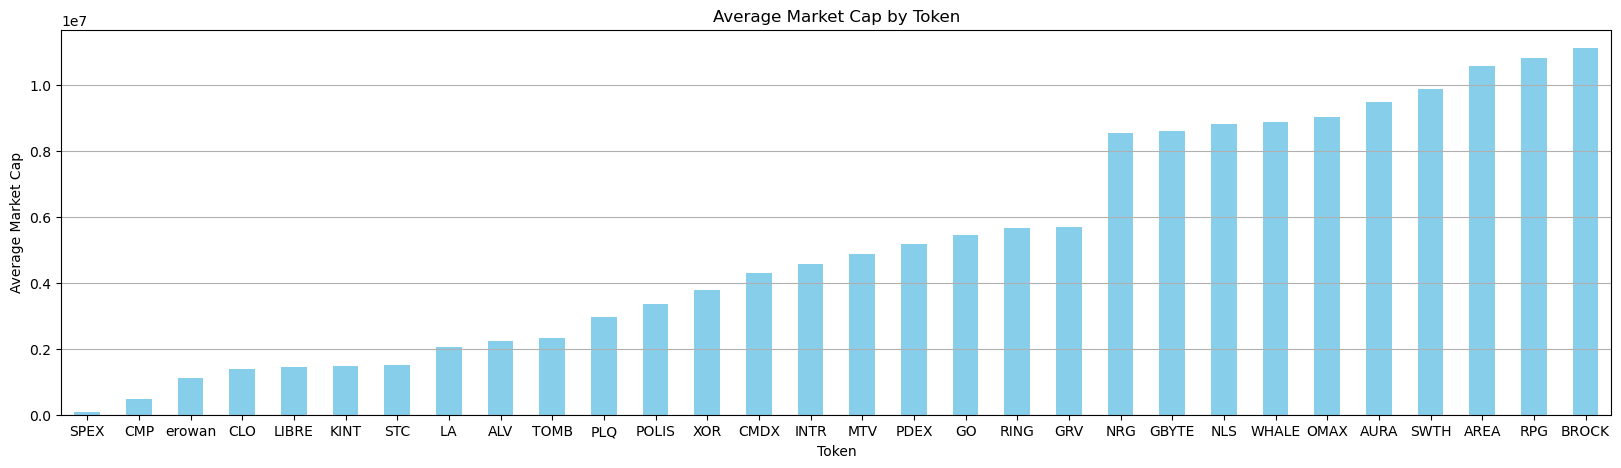

In [27]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can identify SPEX as the token with the lowest average market cap, but we can identify some other tokens that have a low value...

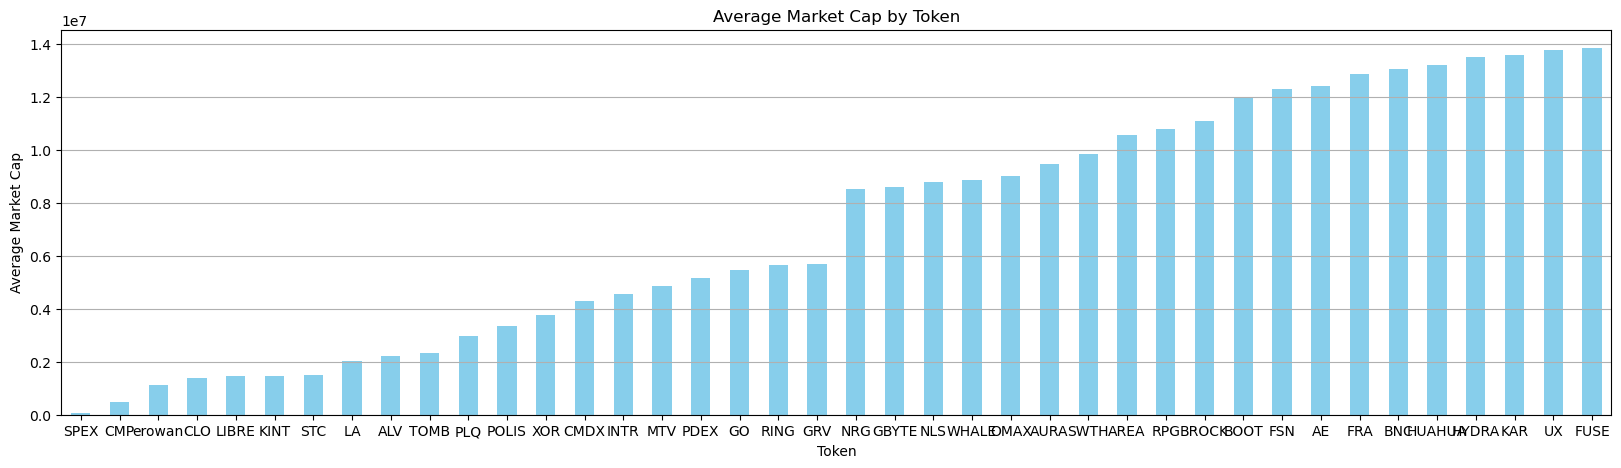

In [31]:
# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:40].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

## Showing the mar